#### Import necessary packages and datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("data\\data.xlsx")
print("Number of instance in the dataset is :{}".format(len(df)))

Number of instance in the dataset is :9720


In [3]:
df = df[df["LMTD"] > 0]
print("Number of instance in the dataset is :{}".format(len(df)))

Number of instance in the dataset is :8480


In [4]:
# Drop the data points with non positive chilling Duty
df = df[df["LA Chilling Duty"] >= 0]
print("Number of instance in the dataset is :{}".format(len(df)))

Number of instance in the dataset is :5704


In [5]:
df["SLAD (MJ/kg)"] = (0.001 * df["LA Chilling Duty"]) / df["Captured CO2 (kg/h)"]

## Exploring the data

In [6]:
df.columns

Index(['State', 'FG Massflow (kg/h)', 'Flue gas CO2 cons', 'FG Temperature',
       'Lean Amine Mass flow (kg/h)', 'Lean Amine Temperature',
       'WWT Flow rate', 'WWB Flow rate', 'RA2Reg-Temperature',
       'Reboiler Duty (kJ/h)', 'LA Chilling Duty', 'WWT Cooling Duty',
       'WWT Cooling Duty2', 'MEA Emission PPM', 'CO2 Mass Flow @ Off Gas',
       'MEA Emission', 'FG Flue Rate (Sm3/h)', 'L/G (kg/kg)', 'L/G (kg/Sm3)',
       'Lean Loading', 'Captured CO2 (kg/h)', 'CO2 Capture Efficiency',
       'Rich Loading', 'RA Flow Rate', 'RA Temp after Abs', 'Reboiler Duty',
       'Condensor Duty (kJ/h)', 'SRD (MJ/kg CO2)', 'Condensor Specific Duty',
       'CO2 Product purity', 'CO2 Production Mass Flow', 'Reg Bttm Temp',
       'Reg Bttm Flow Rate', 'LA after HE', 'Left Min Apprch',
       'Right Min Appr', 'LMTD', 'MEA Makeup', 'Abs Height', 'SLAD (MJ/kg)'],
      dtype='object')

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FG Massflow (kg/h),5704.0,7.207411e+04,1.031939e+01,7.207000e+04,7.207000e+04,7.207000e+04,7.207000e+04,7.210000e+04
Flue gas CO2 cons,5704.0,8.359599e-02,3.298276e-02,3.600000e-02,5.950000e-02,9.050000e-02,1.088000e-01,1.324000e-01
FG Temperature,5704.0,3.695126e+01,1.178362e+01,2.000000e+01,2.000000e+01,3.500000e+01,5.000000e+01,5.000000e+01
Lean Amine Mass flow (kg/h),5704.0,1.351625e+05,8.233373e+04,4.160000e+04,8.120000e+04,1.010000e+05,1.670000e+05,3.000000e+05
Lean Amine Temperature,5704.0,3.728787e+01,7.417124e+00,3.000000e+01,3.000000e+01,4.000000e+01,4.000000e+01,5.000000e+01
WWT Flow rate,5704.0,5.500000e+04,0.000000e+00,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04
WWB Flow rate,5704.0,5.500863e+04,3.439796e+00,5.500000e+04,5.501000e+04,5.501000e+04,5.501000e+04,5.501000e+04
RA2Reg-Temperature,5704.0,1.043051e+02,1.206691e+00,1.030000e+02,1.030000e+02,1.045000e+02,1.060000e+02,1.060000e+02
Reboiler Duty (kJ/h),5704.0,3.078945e+07,1.236984e+07,1.000000e+07,2.000000e+07,3.000000e+07,4.400000e+07,5.200000e+07
LA Chilling Duty,5704.0,6.601097e+06,6.968066e+06,1.936000e+03,1.786000e+06,3.944500e+06,8.888750e+06,3.744000e+07


In [8]:
# An initial assessment about how SRD is effected by Flue gas CO2 cons
df.groupby(["Flue gas CO2 cons"]).mean()["SRD (MJ/kg CO2)"]

Flue gas CO2 cons
0.0360    5.918239
0.0595    4.781794
0.0838    4.705801
0.0905    4.611641
0.1088    4.251134
0.1324    4.023896
Name: SRD (MJ/kg CO2), dtype: float64

In [9]:
# An initial assessment about how SRD is effected by L/G
df.groupby(['L/G (kg/kg)']).mean()["SRD (MJ/kg CO2)"]

L/G (kg/kg)
0.5772    5.989826
0.8519    5.181022
1.1270    4.957204
1.3880    4.934932
1.4010    4.861929
2.3130    4.145416
3.2380    4.077921
4.1630    4.058419
Name: SRD (MJ/kg CO2), dtype: float64

In [10]:
# An initial assessment about how SRD is effected by Flue gas CO2 cons and Abs Height
df.groupby(["Flue gas CO2 cons", "Abs Height"]).mean()["SRD (MJ/kg CO2)"]

Flue gas CO2 cons  Abs Height
0.0360             12            6.007116
                   18            5.863601
                   24            5.872174
0.0595             12            4.809409
                   18            4.770784
                   24            4.760532
0.0838             12            4.691938
                   18            4.702836
                   24            4.725310
0.0905             12            4.706252
                   18            4.546398
                   24            4.547103
0.1088             12            4.368716
                   18            4.198486
                   24            4.166482
0.1324             12            4.121771
                   18            3.989288
                   24            3.934756
Name: SRD (MJ/kg CO2), dtype: float64

In [11]:
# An initial assessment about how SRD is effected by L/G (kg/kg) and Abs Height
df.groupby([ 'L/G (kg/kg)', "Abs Height"]).mean()["SRD (MJ/kg CO2)"]

L/G (kg/kg)  Abs Height
0.5772       12            6.056396
             18            5.959155
             24            5.949458
0.8519       12            5.248815
             18            5.149104
             24            5.135199
1.1270       12            4.997382
             18            4.935604
             24            4.931164
1.3880       12            5.050829
             18            4.876832
             24            4.848038
1.4010       12            4.901602
             18            4.827603
             24            4.849940
2.3130       12            4.269415
             18            4.094960
             24            4.031709
3.2380       12            4.200606
             18            4.036273
             24            3.954699
4.1630       12            4.138173
             18            4.085486
             24            3.904413
Name: SRD (MJ/kg CO2), dtype: float64

### Visualization

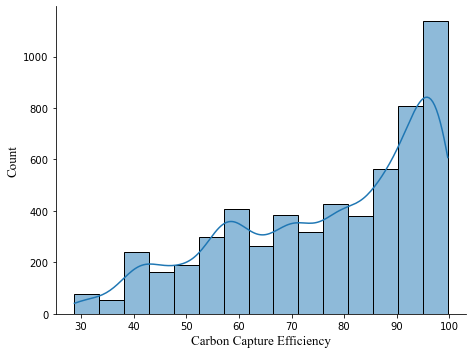

In [12]:
viz = sns.displot(df["CO2 Capture Efficiency"], bins=15, kde=True, height=5, aspect=1.33)
viz.ax.set_xlabel(xlabel= 'Carbon Capture Efficiency',fontname="Times New Roman", fontsize=13)
viz.ax.set_ylabel(ylabel= 'Count',fontname="Times New Roman", fontsize=13)
viz.savefig("Figures\\Capture Efficiency Distribution.png", dpi=600)

In [ ]:
viz = sns.displot(df["SRD (MJ/kg CO2)"], bins=15, kde=True, height=5, aspect=1.33, color='green')
viz.ax.set_xlabel(xlabel= 'Specific Reboiler Duty (MJ/kg CO2)',fontname="Times New Roman", fontsize=13)
viz.ax.set_ylabel(ylabel= 'Count',fontname="Times New Roman", fontsize=13)
viz.savefig("Figures\\Reboiler Duty Distribution.png", dpi=600)

In [ ]:
viz = sns.displot(df["Lean Loading"], bins=15, kde=True, height=5, aspect=1.33)
viz.ax.set_xlabel(xlabel= 'Lean Loading',fontname="Times New Roman", fontsize=13)
viz.ax.set_ylabel(ylabel= 'Count',fontname="Times New Roman", fontsize=13)
viz.savefig("Figures\\Lean Loading Distribution.png", dpi=600)

In [ ]:
viz = sns.displot(df["Rich Loading"], bins=15, kde=True, height=5, aspect=1.33)
viz.ax.set_xlabel(xlabel= 'Rich Loading',fontname="Times New Roman", fontsize=13)
viz.ax.set_ylabel(ylabel= 'Count',fontname="Times New Roman", fontsize=13)
viz.savefig("Figures\\Rich Loading Distribution.png", dpi=600)

In [ ]:
viz = sns.displot(df["Condensor Specific Duty"], bins=15, kde=True, height=5, aspect=1.33, color='green')
viz.ax.set_xlabel(xlabel= 'Specific Condenser Duty (MJ/kg CO2)',fontname="Times New Roman", fontsize=13)
viz.ax.set_ylabel(ylabel= 'Count',fontname="Times New Roman", fontsize=13)
viz.savefig("Figures\\Condenser Duty Distribution.png", dpi=600)

In [ ]:
viz = sns.displot(df["SLAD (MJ/kg)"], bins=15, kde=True, height=5, aspect=1.33, color='green')
viz.ax.set_xlabel(xlabel= 'Specific Lean Amine Cooling Duty (MJ/kg CO2)',fontname="Times New Roman", fontsize=13)
viz.ax.set_ylabel(ylabel= 'Count',fontname="Times New Roman", fontsize=13)
viz.savefig("Figures\\Lean Amine Cooling Duty Distribution.png", dpi=600)

In [ ]:
viz = sns.displot(df["CO2 Product purity"], bins=15, kde=True, height=5, aspect=1.33)
viz.ax.set_xlabel(xlabel= 'Product CO2 Purity (mol/mol)',fontname="Times New Roman", fontsize=13)
viz.ax.set_ylabel(ylabel= 'Count',fontname="Times New Roman", fontsize=13)
viz.savefig("Figures\\Product CO2 Purity Distribution.png", dpi=600)

In [ ]:
viz = sns.displot(df["LMTD"], bins=15, kde=True, height=5, aspect=1.33)
viz.ax.set_xlabel(xlabel= 'LMTD',fontname="Times New Roman", fontsize=13)
viz.ax.set_ylabel(ylabel= 'Count',fontname="Times New Roman", fontsize=13)
viz.savefig("Figures\\LMTD Distribution.png", dpi=600)

In [ ]:
sns.jointplot(data= df[ (df["CO2 Capture Efficiency"] >= 85) & (df["CO2 Capture Efficiency"] <= 90)] , 
              x= "LMTD", 
              y="SRD (MJ/kg CO2)",
              hue="Flue gas CO2 cons",
              cmap="Blues"
             )

# Machine Learning

#### Import common Machine Learning Packages

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from joblib import dump, load

Random Sample of DATA

In [14]:
Data = df[["FG Temperature", "Lean Loading",'Lean Amine Temperature','L/G (kg/kg)','Flue gas CO2 cons','CO2 Capture Efficiency','LMTD','Abs Height',"SRD (MJ/kg CO2)", "Condensor Specific Duty", "SLAD (MJ/kg)" ]]

In [24]:
np.random.seed(211)
randomdata = Data.sample(10)
randomdata.to_excel('Tables\\Random Selection.xlsx', index=False )

#### Define the inputs & outputs (Features and Targets)

In [ ]:
# XA Represents the data for Advanced Design
XA = df[["FG Temperature", "Lean Loading",'Lean Amine Temperature','L/G (kg/kg)','Flue gas CO2 cons','CO2 Capture Efficiency','LMTD','Abs Height']]

In [ ]:
# XN Represents the data for Normal Design
XN = df[["FG Temperature", "Lean Loading",'Lean Amine Temperature','L/G (kg/kg)','Flue gas CO2 cons','CO2 Capture Efficiency']]

In [ ]:
y = df[["SRD (MJ/kg CO2)", "Condensor Specific Duty", "SLAD (MJ/kg)"]]

In [ ]:
# 70% & 30% train / test split
XA_train, XA_test, y_train, y_test = train_test_split(XA, y, test_size=0.30, random_state=211)
XN_train, XN_test, y_train, y_test = train_test_split(XN, y, test_size=0.30, random_state=211)

#### Define the dataframe function for performance evaluation

In [ ]:
# Here the dataframes that are supposed to store the ML model performance metrics are initiated

performance_SRD = pd.DataFrame(columns=["name","R^2_A", "MAE_A", "MAPE_A", "RMSE_A", "R^2_N", "MAE_N", "MAPE_N", "RMSE_N"])
performance_ConSD = pd.DataFrame(columns=["name","R^2_A", "MAE_A", "MAPE_A", "RMSE_A", "R^2_N", "MAE_N", "MAPE_N", "RMSE_N"])
performance_SLAD = pd.DataFrame(columns=["name","R^2_A", "MAE_A", "MAPE_A", "RMSE_A", "R^2_N", "MAE_N", "MAPE_N", "RMSE_N"])

In [ ]:
# The next 3 Cells take the ML model and calculate its performance metrics (one for each of the target values)

In [ ]:
def evaldf_SRD(A_pred, N_pred, model_name):
    
    row = pd.DataFrame(
                        {
                         "name": str(str(model_name) + '_SRD'),
                         "R^2_A": r2_score(y_test["SRD (MJ/kg CO2)"], A_pred[: , 0]),
                         "MAE_A": mean_absolute_error(y_test["SRD (MJ/kg CO2)"], A_pred[: , 0]),
                         "MAPE_A": mean_absolute_percentage_error(y_test["SRD (MJ/kg CO2)"], A_pred[: , 0]),
                         "RMSE_A": np.sqrt(mean_squared_error(y_test["SRD (MJ/kg CO2)"], A_pred[: , 0])),
                         "R^2_N": r2_score(y_test["SRD (MJ/kg CO2)"], N_pred[: , 0]),
                         "MAE_N": mean_absolute_error(y_test["SRD (MJ/kg CO2)"], N_pred[: , 0]),
                         "MAPE_N": mean_absolute_percentage_error(y_test["SRD (MJ/kg CO2)"], N_pred[: , 0]),
                         "RMSE_N": np.sqrt(mean_squared_error(y_test["SRD (MJ/kg CO2)"], N_pred[: , 0]))
                        }
            , index=[0])
    
    global performance_SRD
    
    performance_SRD = pd.concat([performance_SRD, row], ignore_index=True)    

In [ ]:
def evaldf_ConSD(A_pred, N_pred, model_name):
    
    row = pd.DataFrame(
                        {
                         "name": str(str(model_name) + '_ConsSD'),
                         "R^2_A": r2_score(y_test["Condensor Specific Duty"], A_pred[: , 1]),
                         "MAE_A": mean_absolute_error(y_test["Condensor Specific Duty"], A_pred[: , 1]),
                         "MAPE_A": mean_absolute_percentage_error(y_test["Condensor Specific Duty"], A_pred[: , 1]),
                         "RMSE_A": np.sqrt(mean_squared_error(y_test["Condensor Specific Duty"], A_pred[: , 1])),
                         "R^2_N": r2_score(y_test["Condensor Specific Duty"], N_pred[: , 1]),
                         "MAE_N": mean_absolute_error(y_test["Condensor Specific Duty"], N_pred[: , 1]),
                         "MAPE_N": mean_absolute_percentage_error(y_test["Condensor Specific Duty"], N_pred[: , 1]),
                         "RMSE_N": np.sqrt(mean_squared_error(y_test["Condensor Specific Duty"], N_pred[: , 1]))
                        }
            , index=[0])
        
    global performance_ConSD
    
    performance_ConSD = pd.concat([performance_ConSD, row], ignore_index=True)    

In [ ]:
def evaldf_SLAD(A_pred, N_pred, model_name):
    
    row = pd.DataFrame(
                        {
                         "name": str(str(model_name) + '_SLAD'),
                         "R^2_A": r2_score(y_test["SLAD (MJ/kg)"], A_pred[: , 2]),
                         "MAE_A": mean_absolute_error(y_test["SLAD (MJ/kg)"], A_pred[: , 2]),
                         "MAPE_A": mean_absolute_percentage_error(y_test["SLAD (MJ/kg)"], A_pred[: , 2]),
                         "RMSE_A": np.sqrt(mean_squared_error(y_test["SLAD (MJ/kg)"], A_pred[: , 2])),
                         "R^2_N": r2_score(y_test["SLAD (MJ/kg)"], N_pred[: , 2]),
                         "MAE_N": mean_absolute_error(y_test["SLAD (MJ/kg)"], N_pred[: , 2]),
                         "MAPE_N": mean_absolute_percentage_error(y_test["SLAD (MJ/kg)"], N_pred[: , 2]),
                         "RMSE_N": np.sqrt(mean_squared_error(y_test["SLAD (MJ/kg)"], N_pred[: , 2]))
                        }
            , index=[0])
    
    global performance_SLAD
     
    performance_SLAD = pd.concat([performance_SLAD, row], ignore_index=True)    

#### Define the ploting function

In [ ]:
# Here the plot configuration for graphic evaluation of the ML models are defined


def plot_result(A_pred, N_pred, name):
    figs, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15), dpi=300)

    axes[0,0].plot(np.arange(2,10), np.arange(2,10), color = "red")
    axes[0,0].scatter(y_test["SRD (MJ/kg CO2)"], A_pred[: , 0], alpha=0.1)
    axes[0,0].set_xlabel('Actual Specific Reboiler Duty (MJ/kg CO2)',fontname="Times New Roman", fontsize=10)
    axes[0,0].set_ylabel('Predicted Specific Reboiler Duty (MJ/kg CO2)',fontname="Times New Roman", fontsize=10)
    axes[0,0].set_title('Plots for advanced feature set',fontname="Times New Roman", fontsize=18)
    
    
    axes[0,1].plot(np.arange(2,10), np.arange(2,10), color = "red")
    axes[0,1].scatter(y_test["SRD (MJ/kg CO2)"], N_pred[: , 0], alpha=0.1)
    axes[0,1].set_xlabel('Actual Specific Reboiler Duty (MJ/kg CO2)',fontname="Times New Roman", fontsize=10)
    axes[0,1].set_ylabel('Predicted Specific Reboiler Duty (MJ/kg CO2)',fontname="Times New Roman", fontsize=10)
    axes[0,1].set_title('Plots for normal feature set',fontname="Times New Roman", fontsize=18)
    
    
    

    axes[1,0].plot(np.arange(0,7), np.arange(0,7), color = "red")
    axes[1,0].scatter(y_test['Condensor Specific Duty'], A_pred[: , 1], alpha=0.1)
    axes[1,0].set_xlabel('Actual Specific Condenser Duty (MJ/kg CO2)',fontname="Times New Roman", fontsize=10)
    axes[1,0].set_ylabel('Predicted Specific Condenser Duty (MJ/kg CO2)',fontname="Times New Roman", fontsize=10)

    
    axes[1,1].plot(np.arange(0,7), np.arange(0,7), color = "red")
    axes[1,1].scatter(y_test['Condensor Specific Duty'], N_pred[: , 1], alpha=0.1)
    axes[1,1].set_xlabel('Actual Specific Condenser Duty (MJ/kg CO2)',fontname="Times New Roman", fontsize=10)
    axes[1,1].set_ylabel('Predicted Specific Condenser Duty (MJ/kg CO2)',fontname="Times New Roman", fontsize=10)

    
    axes[2,0].plot(np.arange(0,5), np.arange(0,5), color = "red")
    axes[2,0].scatter(y_test['SLAD (MJ/kg)'], A_pred[: , 2], alpha=0.1)
    axes[2,0].set_xlabel('Actual Specific Lean Amine Cooling Duty (MJ/kg CO2)',fontname="Times New Roman", fontsize=10)
    axes[2,0].set_ylabel('Predicted Specific Lean Amine Cooling Duty (MJ/kg CO2)',fontname="Times New Roman", fontsize=10)
    
    
    axes[2,1].plot(np.arange(0,5), np.arange(0,5), color = "red")
    axes[2,1].scatter(y_test['SLAD (MJ/kg)'], N_pred[: , 2], alpha=0.1)
    axes[2,1].set_xlabel('Actual Specific Lean Amine Cooling Duty (MJ/kg CO2)',fontname="Times New Roman", fontsize=10)
    axes[2,1].set_ylabel('Predicted Specific Lean Amine Cooling Duty (MJ/kg CO2)',fontname="Times New Roman", fontsize=10)
    
    plt.savefig('Figures\\' + name + ' model performance.png', dpi=600, bbox_inches='tight')
    

In [ ]:
# Defining a random state

rs = 211

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
DTmodelA = MultiOutputRegressor(DecisionTreeRegressor(max_depth=None,
                                                      max_features=1.0,
                                                      max_leaf_nodes=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      splitter='best',
                                                      random_state=rs)
                                ).fit(XA_train, y_train)

DTmodelN = MultiOutputRegressor(DecisionTreeRegressor(max_depth=None,
                                                      max_features=1.0,
                                                      max_leaf_nodes=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      splitter='best',
                                                      random_state=rs)
                               ).fit(XN_train, y_train)

In [ ]:
DTmodelA_pred = DTmodelA.predict(XA_test)
DTmodelN_pred = DTmodelN.predict(XN_test)

In [ ]:
evaldf_SRD(DTmodelA_pred, DTmodelN_pred, 'DT')
evaldf_ConSD(DTmodelA_pred, DTmodelN_pred, 'DT')
evaldf_SLAD(DTmodelA_pred, DTmodelN_pred, 'DT')

In [ ]:
plot_result(DTmodelA_pred, DTmodelN_pred, 'DT')

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RFmodelA = MultiOutputRegressor(RandomForestRegressor(max_depth=20,
                                                      max_features=6,
                                                      n_estimators=600,
                                                      n_jobs=-1,
                                                      random_state=rs)
                                ).fit(XA_train, y_train)

RFmodelN = MultiOutputRegressor(RandomForestRegressor(max_depth=20,
                                                      max_features=6,
                                                      n_estimators=600,
                                                      n_jobs=-1,
                                                      random_state=rs)
                               ).fit(XN_train, y_train)

In [ ]:
RFmodelA_pred = RFmodelA.predict(XA_test)
RFmodelN_pred = RFmodelN.predict(XN_test)

In [ ]:
evaldf_SRD(RFmodelA_pred, RFmodelN_pred, 'RF')
evaldf_ConSD(RFmodelA_pred, RFmodelN_pred, 'RF')
evaldf_SLAD(RFmodelA_pred, RFmodelN_pred, 'RF')

In [ ]:
plot_result(RFmodelA_pred, RFmodelN_pred, 'RF')

## XGBoost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
XGmodelA = MultiOutputRegressor(XGBRegressor(max_depth=10,
                                             learnin_rate=0.05,
                                             subsample=0.8,
                                             n_estimators=250,
                                             n_jobs=-1,
                                             verbosity=0,
                                             random_state=rs)
                               ).fit(XA_train, y_train)

XGmodelN = MultiOutputRegressor(XGBRegressor(max_depth=10,
                                             learnin_rate=0.05,
                                             subsample=0.8,
                                             n_estimators=250,
                                             n_jobs=-1,
                                             verbosity=0,
                                             random_state=rs)
                               ).fit(XN_train, y_train)

In [ ]:
XGmodelA_pred = XGmodelA.predict(XA_test)
XGmodelN_pred = XGmodelN.predict(XN_test)

In [ ]:
evaldf_SRD(XGmodelA_pred, XGmodelN_pred, 'XG')
evaldf_ConSD(XGmodelA_pred, XGmodelN_pred, 'XG')
evaldf_SLAD(XGmodelA_pred, XGmodelN_pred, 'XG')

In [ ]:
plot_result(XGmodelA_pred, XGmodelN_pred, 'XG')

## SVM

In [ ]:
from sklearn.svm import SVR

In [ ]:
SVmodelA = MultiOutputRegressor(Pipeline([('scaler', StandardScaler()),
                                          ('svrA', SVR(C=100, degree=2, gamma= 'auto', kernel ='rbf'))])
                               ).fit(XA_train, y_train)

SVmodelN = MultiOutputRegressor(Pipeline([('scaler', StandardScaler()),
                                          ('svrN', SVR(C=100, degree=2, gamma= 'auto', kernel ='rbf'))])
                               ).fit(XN_train, y_train)

In [ ]:
SVmodelA_pred = SVmodelA.predict(XA_test)
SVmodelN_pred = SVmodelN.predict(XN_test)

In [ ]:
evaldf_SRD(SVmodelA_pred, SVmodelN_pred, 'SV')
evaldf_ConSD(SVmodelA_pred, SVmodelN_pred, 'SV')
evaldf_SLAD(SVmodelA_pred, SVmodelN_pred, 'SV')

In [ ]:
plot_result(SVmodelA_pred, SVmodelN_pred, 'SV')

## DL

In [ ]:
import tensorflow as tf

In [ ]:
scalerA = StandardScaler()
scalerA.fit(XA_train)
XA_train_s = pd.DataFrame(scalerA.transform(XA_train), columns=XA_train.columns)
XA_test_s = pd.DataFrame(scalerA.transform(XA_test), columns=XA_test.columns)

In [ ]:
scalerN = StandardScaler()
scalerN.fit(XN_train)
XN_train_s = pd.DataFrame(scalerN.transform(XN_train), columns=XN_train.columns)
XN_test_s = pd.DataFrame(scalerN.transform(XN_test), columns=XN_test.columns)

In [ ]:
np.random.seed(rs)
tf.random.set_seed(rs)

In [ ]:
DLmodelA = tf.keras.Sequential()

DLmodelA.add(tf.keras.layers.Dense(22, input_dim=XA_train_s.shape[1], activation='tanh'))
DLmodelA.add(tf.keras.layers.Dense(26, activation='tanh'))
DLmodelA.add(tf.keras.layers.Dense(30, activation='tanh'))
DLmodelA.add(tf.keras.layers.Dense(30, activation='tanh'))
DLmodelA.add(tf.keras.layers.Dense(30, activation='tanh'))
DLmodelA.add(tf.keras.layers.Dense(3))

DLmodelA.compile(loss="mean_squared_error", optimizer="adam")

DLmodelA.fit(XA_train_s, y_train, epochs= 150)

In [ ]:
DLmodelN = tf.keras.Sequential()

DLmodelN.add(tf.keras.layers.Dense(22, input_dim=XN_train_s.shape[1], activation='tanh'))
DLmodelN.add(tf.keras.layers.Dense(26, activation='tanh'))
DLmodelN.add(tf.keras.layers.Dense(30, activation='tanh'))
DLmodelN.add(tf.keras.layers.Dense(30, activation='tanh'))
DLmodelN.add(tf.keras.layers.Dense(30, activation='tanh'))
DLmodelN.add(tf.keras.layers.Dense(3))

DLmodelN.compile(loss="mean_squared_error", optimizer="adam")

DLmodelN.fit(XN_train_s, y_train, epochs= 150)

In [ ]:
DLmodelA_pred = DLmodelA.predict(XA_test_s)
DLmodelN_pred = DLmodelN.predict(XN_test_s)

In [ ]:
evaldf_SRD(DLmodelA_pred, DLmodelN_pred, 'DL')
evaldf_ConSD(DLmodelA_pred, DLmodelN_pred, 'DL')
evaldf_SLAD(DLmodelA_pred, DLmodelN_pred, 'DL')

In [ ]:
plot_result(DLmodelA_pred, DLmodelN_pred, 'DL')

### Performance Table

In [ ]:
performance_SRD.to_excel('Tables\\Specific Reboiler Duty performance.xlsx', index=False )
performance_SRD 

In [ ]:
performance_ConSD.to_excel('Tables\\Specific Condenser Duty performance.xlsx', index=False )
performance_ConSD

In [ ]:
performance_SLAD.to_excel('Tables\\Specific LA Cooling Duty performance.xlsx', index=False )
performance_SLAD 

### Out of Range evaluations (outer scope)

In [ ]:
os = pd.read_excel('data/os_data.xlsx')

In [ ]:
os = os[os["LMTD"] > 0]

In [ ]:
os = os[os["LA Chilling Duty"] >= 0]

In [ ]:
os["SLAD (MJ/kg)"] = (0.001 * os["LA Chilling Duty"]) / os["Captured CO2 (kg/h)"]

In [ ]:
sns.displot(os["LMTD"], bins=20, kde=True)

In [ ]:
os_inp_A = os[["FG Temperature", "Lean Loading",'Lean Amine Temperature','L/G (kg/kg)','Flue gas CO2 cons','CO2 Capture Efficiency','LMTD','Abs Height']]
os_inp_N = os[["FG Temperature", "Lean Loading",'Lean Amine Temperature','L/G (kg/kg)','Flue gas CO2 cons','CO2 Capture Efficiency']]

In [ ]:
os_out = os[["SRD (MJ/kg CO2)", "Condensor Specific Duty", "SLAD (MJ/kg)"]]

In [ ]:
DTmodelA_ospred = DTmodelA.predict(os_inp_A)
RFmodelA_ospred = RFmodelA.predict(os_inp_A)
XGmodelA_ospred = XGmodelA.predict(os_inp_A)
SVmodelA_ospred = SVmodelA.predict(os_inp_A)
DLmodelA_ospred = DLmodelA.predict(scalerA.transform(os_inp_A))

In [ ]:
DTmodelN_ospred = DTmodelN.predict(os_inp_N)
RFmodelN_ospred = RFmodelN.predict(os_inp_N)
XGmodelN_ospred = XGmodelN.predict(os_inp_N)
SVmodelN_ospred = SVmodelN.predict(os_inp_N)
DLmodelN_ospred = DLmodelN.predict(scalerN.transform(os_inp_N))

In [ ]:
def os_plot(Y1, Y2, plot_name):
    
    AB = ['DT', 'RF', 'XG', 'SV', 'DL']
    AB_ax = np.arange(len(AB))
    plt.bar(AB_ax - 0.2, Y1, 0.4, label = 'Adv')
    plt.bar(AB_ax + 0.2, Y2, 0.4, label = 'Nor')
    
    plt.xticks(AB_ax, AB)
    plt.xlabel("ML Models", fontname="Times New Roman", fontsize=10)
    plt.ylabel("% MAPE", fontname="Times New Roman", fontsize=10)
    plt.legend()
    
    plt.savefig('Figures\\' + plot_name + ' OS MAPE.jpg', dpi=600, bbox_inches='tight')
    
    plt.show()

In [ ]:
Y_0_A = [mean_absolute_percentage_error(os_out["SRD (MJ/kg CO2)"], DTmodelA_ospred[: , 0]) * 100 ,
         mean_absolute_percentage_error(os_out["SRD (MJ/kg CO2)"], RFmodelA_ospred[: , 0]) * 100 ,
         mean_absolute_percentage_error(os_out["SRD (MJ/kg CO2)"], XGmodelA_ospred[: , 0]) * 100 ,
         mean_absolute_percentage_error(os_out["SRD (MJ/kg CO2)"], SVmodelA_ospred[: , 0]) * 100 ,
         mean_absolute_percentage_error(os_out["SRD (MJ/kg CO2)"], DLmodelA_ospred[: , 0]) * 100 ]

In [ ]:
Y_0_N = [mean_absolute_percentage_error(os_out["SRD (MJ/kg CO2)"], DTmodelN_ospred[: , 0]) * 100 ,
         mean_absolute_percentage_error(os_out["SRD (MJ/kg CO2)"], RFmodelN_ospred[: , 0]) * 100 ,
         mean_absolute_percentage_error(os_out["SRD (MJ/kg CO2)"], XGmodelN_ospred[: , 0]) * 100 ,
         mean_absolute_percentage_error(os_out["SRD (MJ/kg CO2)"], SVmodelN_ospred[: , 0]) * 100 ,
         mean_absolute_percentage_error(os_out["SRD (MJ/kg CO2)"], DLmodelN_ospred[: , 0]) * 100 ]

In [ ]:
os_plot(Y_0_A, Y_0_N, 'Specific Reboiler Duty Predictions')

In [ ]:
Y_1_A = [mean_absolute_percentage_error(os_out["Condensor Specific Duty"], DTmodelA_ospred[: , 1]) * 100 ,
         mean_absolute_percentage_error(os_out["Condensor Specific Duty"], RFmodelA_ospred[: , 1]) * 100 ,
         mean_absolute_percentage_error(os_out["Condensor Specific Duty"], XGmodelA_ospred[: , 1]) * 100 ,
         mean_absolute_percentage_error(os_out["Condensor Specific Duty"], SVmodelA_ospred[: , 1]) * 100 ,
         mean_absolute_percentage_error(os_out["Condensor Specific Duty"], DLmodelA_ospred[: , 1]) * 100]

In [ ]:
Y_1_N = [mean_absolute_percentage_error(os_out["Condensor Specific Duty"], DTmodelN_ospred[: , 1]) * 100 ,
         mean_absolute_percentage_error(os_out["Condensor Specific Duty"], RFmodelN_ospred[: , 1]) * 100 ,
         mean_absolute_percentage_error(os_out["Condensor Specific Duty"], XGmodelN_ospred[: , 1]) * 100 ,
         mean_absolute_percentage_error(os_out["Condensor Specific Duty"], SVmodelN_ospred[: , 1]) * 100 ,
         mean_absolute_percentage_error(os_out["Condensor Specific Duty"], DLmodelN_ospred[: , 1]) * 100]

In [ ]:
os_plot(Y_1_A, Y_1_N, 'Specific Condenser Duty Predictions')

In [ ]:
Y_2_A = [mean_absolute_percentage_error(os_out["SLAD (MJ/kg)"], DTmodelA_ospred[: , 2]) * 100 ,
         mean_absolute_percentage_error(os_out["SLAD (MJ/kg)"], RFmodelA_ospred[: , 2]) * 100 ,
         mean_absolute_percentage_error(os_out["SLAD (MJ/kg)"], XGmodelA_ospred[: , 2]) * 100 ,
         mean_absolute_percentage_error(os_out["SLAD (MJ/kg)"], SVmodelA_ospred[: , 2]) * 100 ,
         mean_absolute_percentage_error(os_out["SLAD (MJ/kg)"], DLmodelA_ospred[: , 2]) * 100 ]

In [ ]:
Y_2_N = [mean_absolute_percentage_error(os_out["SLAD (MJ/kg)"], DTmodelN_ospred[: , 2]) * 100 ,
         mean_absolute_percentage_error(os_out["SLAD (MJ/kg)"], RFmodelN_ospred[: , 2]) * 100 ,
         mean_absolute_percentage_error(os_out["SLAD (MJ/kg)"], XGmodelN_ospred[: , 2]) * 100 ,
         mean_absolute_percentage_error(os_out["SLAD (MJ/kg)"], SVmodelN_ospred[: , 2]) * 100 ,
         mean_absolute_percentage_error(os_out["SLAD (MJ/kg)"], DLmodelN_ospred[: , 2]) * 100 ]

In [ ]:
os_plot(Y_2_A, Y_2_N, 'Specific LA Cooling Duty Predictions')

### Deploy The best models with all data

In [ ]:
all_inputA = pd.concat( [XA , os_inp_A] )
all_inputN = pd.concat( [XN , os_inp_N] )

In [ ]:
all_output = pd.concat( [y , os_out] )

In [ ]:
all_scalerA = StandardScaler()
all_scalerA.fit(all_inputA)
All_XA = pd.DataFrame(all_scalerA.transform(all_inputA), columns=all_inputA.columns)

In [ ]:
all_scalerN = StandardScaler()
all_scalerN.fit(all_inputN)
All_XN = pd.DataFrame(all_scalerN.transform(all_inputN), columns=all_inputN.columns)

In [ ]:
BmodelA = tf.keras.Sequential()

BmodelA.add(tf.keras.layers.Dense(22, input_dim=All_XA.shape[1], activation='tanh'))
BmodelA.add(tf.keras.layers.Dense(26, activation='tanh'))
BmodelA.add(tf.keras.layers.Dense(30, activation='tanh'))
BmodelA.add(tf.keras.layers.Dense(30, activation='tanh'))
BmodelA.add(tf.keras.layers.Dense(30, activation='tanh'))
BmodelA.add(tf.keras.layers.Dense(3))

BmodelA.compile(loss="mean_squared_error", optimizer="adam")

In [ ]:
BmodelA.fit(All_XA, all_output, epochs= 200)

In [ ]:
BmodelN = tf.keras.Sequential()

BmodelN.add(tf.keras.layers.Dense(22, input_dim=All_XN.shape[1], activation='tanh'))
BmodelN.add(tf.keras.layers.Dense(26, activation='tanh'))
BmodelN.add(tf.keras.layers.Dense(30, activation='tanh'))
BmodelN.add(tf.keras.layers.Dense(30, activation='tanh'))
BmodelN.add(tf.keras.layers.Dense(30, activation='tanh'))
BmodelN.add(tf.keras.layers.Dense(3))

BmodelN.compile(loss="mean_squared_error", optimizer="adam")

In [ ]:
BmodelN.fit(All_XN, all_output, epochs= 200)

In [ ]:
BmodelA.save('Finalized_Models\\BmodelA')

In [ ]:
BmodelN.save('Finalized_Models\\BmodelN')

### Feature importance evaluation

In [ ]:
import shap

In [ ]:
explainer = shap.Explainer(BmodelA.predict, All_XA)

In [ ]:
shap_values = explainer(All_XA)

In [ ]:
shap.plots.beeswarm(shap_values[:,:,0], show=False)
plt.savefig('Figures\\SHAP1 SRD.png', dpi=600, bbox_inches='tight')

In [ ]:
shap.plots.bar(shap_values[:,:,0], show=False)
plt.savefig('Figures\\SHAP2 SRD.png', dpi=600, bbox_inches='tight')

In [ ]:
shap.plots.beeswarm(shap_values[:,:,1], show=False)
plt.savefig('Figures\\SHAP1 SCondenserD.png', dpi=600, bbox_inches='tight')

In [ ]:
shap.plots.bar(shap_values[:,:,1], show=False)
plt.savefig('Figures\\SHAP2 SCondenserD.png', dpi=600, bbox_inches='tight')

In [ ]:
shap.plots.beeswarm(shap_values[:,:,2], show=False)
plt.savefig('Figures\\SHAP1 SLAcoolD.png', dpi=600, bbox_inches='tight')

In [ ]:
shap.plots.bar(shap_values[:,:,2], show=False)
plt.savefig('Figures\\SHAP2 SLAcoolD.png', dpi=600, bbox_inches='tight')